In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import xarray as xr

import statsmodels.api as sm

# Mock timeseries analysis

In [43]:
def linear_regression(y, *x):
    X = [xx for xx in x]
    X = np.column_stack(X)
    X = sm.add_constant(X)
    
    return sm.OLS(y, X, hasconst = True).fit()

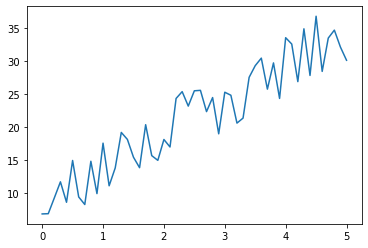

In [44]:
# Mock timeseries
samples = 51
random = np.random.random(samples)*10
random = (random - np.mean(random))

t1 = np.linspace(0, 5, samples)
p = 5*t1 + 9 + random
plt.plot(t1,p)

In [45]:
result = linear_regression(p, t1)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     313.4
Date:                Tue, 21 Apr 2020   Prob (F-statistic):           6.24e-23
Time:                        10:50:46   Log-Likelihood:                -129.09
No. Observations:                  51   AIC:                             262.2
Df Residuals:                      49   BIC:                             266.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4378      0.856      9.854      0.000       6.717      10.159
x1             5.2249      0.295     17.702      0.000       4.632       5.818
==============================================================================
Omnibus:                       26.046   Durbin-Watson:                   2.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                4.094
Skew:                           0.035   Prob(JB):                        0.129
Kurtosis:                       1.614   Cond. No.                         6.24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Techniques on uptake

stats linregress: https://github.com/scipy/scipy/blob/master/scipy/stats/_stats_mstats_common.py

In [49]:
fGCB = './../../../data/GCP/budget.csv'
df = pd.read_csv(fGCB,
                 index_col=0,
                 usecols=[0,4,5,6])

df = df.loc[1959:2017]

ocean = -df["ocean sink"]
land_model = -df["land sink"]
land = -df["land sink"]-df["budget imbalance"]

temp = pd.read_csv('./../../../data/temp/temp_annual.csv', index_col="Year").Temp.loc[1959:2017]

y = land.values
y

array([-1.37638945, -1.91675189, -1.81886027, -2.30795375, -2.23312736,
       -2.2771638 , -0.9222639 , -1.05487483, -2.38411267, -1.7195801 ,
       -1.20467144, -1.89057522, -2.78746728, -1.13169868, -1.35446052,
       -3.06763075, -1.77170661, -2.56150247, -0.56832412, -1.9057209 ,
       -0.55775965, -1.12462956, -2.17793544, -2.39609808, -0.48296698,
       -2.05300625, -1.46022758, -2.836112  ,  0.52899359, -0.75909742,
       -2.73139142, -3.03337004, -3.98694826, -3.76627625, -2.73592314,
       -2.000107  , -1.5379476 , -3.5998759 , -2.19174472,  0.25082342,
       -2.92327086, -3.48142003, -2.36455193, -1.12373072, -1.72597259,
       -3.66188795, -1.89394981, -3.56129785, -2.77561836, -3.8808372 ,
       -4.44483687, -3.03644531, -4.7385349 , -3.6242375 , -3.52822754,
       -4.41066926, -2.53123181, -2.35835452, -4.10629804])

x1 = co2, x2 = temp

In [50]:
x1 = pd.read_csv("./../../../data/CO2/co2_global.csv", index_col="Year")
x1 = x1.loc[1959:2017].values.squeeze()
x1

array([315.486 , 316.163 , 316.856 , 317.558 , 318.268 , 318.997 ,
       319.757 , 320.56  , 321.41  , 322.31  , 323.26  , 324.259 ,
       325.303 , 326.392 , 327.526 , 328.702 , 329.921 , 331.187 ,
       332.505 , 333.874 , 335.286 , 336.732 , 338.202 , 339.69  ,
       341.194 , 342.712 , 344.239 , 345.771 , 347.301 , 348.822 ,
       350.318 , 351.782 , 353.219 , 354.64  , 356.068 , 357.527 ,
       359.037 , 360.604 , 362.231 , 363.916 , 365.652 , 367.431 ,
       369.251 , 371.114 , 373.017 , 374.952 , 376.91  , 378.887 ,
       380.88  , 382.892 , 384.927 , 386.995 , 389.101 , 391.248 ,
       393.435 , 395.651 , 397.886 , 400.13  , 403.5225])

In [52]:
x2 = temp.values.squeeze()

Fundamental (derived) linear regression

In [53]:
alpha = 0.05
ssxm, ssxym, ssyxm, ssym = np.cov(x1, y, bias=1).flat
xmean, ymean = np.mean(x1), np.mean(y)

In [54]:
slope = ssxym / ssxm; slope

-0.02393030060522134

In [55]:
intercept = ymean - slope*xmean; intercept

6.124060670997264

In [56]:
r = ssxym / np.sqrt(ssxm*ssym); r

-0.5358735325843047

statsmodels linear regression

In [57]:
results = linear_regression(y, x1, x2)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     21.14
Date:                Tue, 21 Apr 2020   Prob (F-statistic):           1.45e-07
Time:                        10:54:47   Log-Likelihood:                -75.700
No. Observations:                  59   AIC:                             157.4
Df Residuals:                      56   BIC:                             163.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -42.8681     13.163     -3.257      0.002     -69.237     -16.500
x1            -0.0702      0.013     -5.343      0.000      -0.097      -0.044
x2             4.5171      1.205      3.749      0.000       2.104       6.931
==============================================================================
Omnibus:                        2.693   Durbin-Watson:                   1.408
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.911
Skew:                           0.415   Prob(JB):                        0.385
Kurtosis:                       3.300   Cond. No.                     4.00e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
results.conf_int(0.05).squeeze()

array([[-6.92365208e+01, -1.64997120e+01],
       [-9.65794746e-02, -4.39041671e-02],
       [ 2.10367550e+00,  6.93050745e+00]])

In [59]:
Y = results.params[0]*np.ones(len(x1)) + results.params[1]*x1 + results.params[2]*x2

## Tests

Based off: https://towardsdatascience.com/verifying-and-tackling-the-assumptions-of-linear-regression-32126acea67b

### Linear relationship

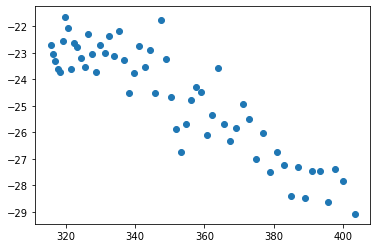

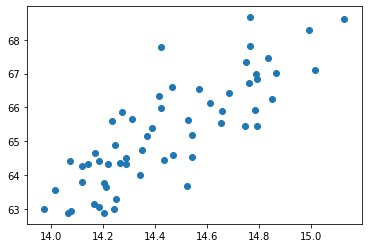

In [61]:
residual = y - Y

plt.figure()
plt.scatter(x1, residual + results.params[1]*x1)

plt.figure()
plt.scatter(x2, residual + results.params[2]*x2)

### Homoscedasticity

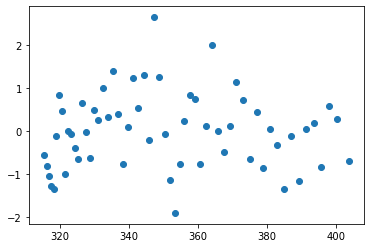

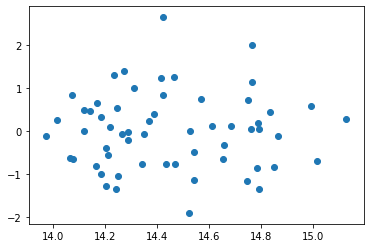

In [62]:
plt.figure()
plt.scatter(x1, residual)
plt.figure()
plt.scatter(x2, residual)

In [64]:
stats.linregress(x1, residual)

LinregressResult(slope=2.8912508561060588e-15, intercept=-4.0816426818447906e-14, rvalue=8.577060999348863e-14, pvalue=0.9999999999994856, stderr=0.004464880582748809)

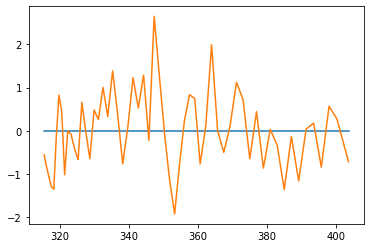

In [65]:
plt.plot(x1, stats.linregress(x1, residual)[0]*x1 + stats.linregress(x1, residual)[1])
plt.plot(x1, residual)

Add temperature to regression

In [67]:
temp = pd.read_csv("./../../../data/temp/HADCRUT4_annual.txt", delim_whitespace=1,
                   index_col="Year",
                   usecols=[0,13]
                  )
temp = temp.loc[1959:2017]

x2 = temp.values.squeeze()

In [69]:
X = np.column_stack((X, x2))

NameError: name 'X' is not defined

In [70]:
mod = sm.OLS(y,X)
res = mod.fit()
res.conf_int(0.05).squeeze()

NameError: name 'X' is not defined

In [194]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     22.27
Date:                Thu, 05 Mar 2020   Prob (F-statistic):           7.64e-08
Time:                        12:40:56   Log-Likelihood:                -75.027
No. Observations:                  59   AIC:                             156.1
Df Residuals:                      56   BIC:                             162.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -42.8153     12.461     -3.436      0.001     -67.779     -17.852
x1            -0.0666      0.012     -5.712      0.000      -0.090      -0.043
x2             4.5016      1.137      3.959      0.000       2.224       6.779
==============================================================================
Omnibus:                        1.974   Durbin-Watson:                   1.371
Prob(Omnibus):                  0.373   Jarque-Bera (JB):                1.391
Skew:                           0.368   Prob(JB):                        0.499
Kurtosis:                       3.159   Cond. No.                     3.83e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Absense of multicollinearity

In [195]:
np.corrcoef(x1,x2)

array([[1.        , 0.92405523],
       [0.92405523, 1.        ]])

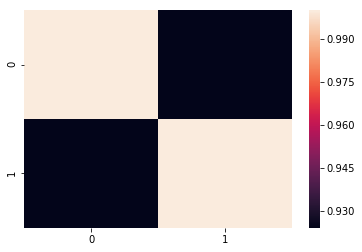

In [196]:
seaborn.heatmap(np.corrcoef(x1,x2))

In [197]:
# VIF score
r = np.corrcoef(x1,x2)[0][1]
VIF = 1/(1-r**2)
r, VIF

(0.9240552304848763, 6.843599677774054)

Seems here that temperature and CO2 are highly correlated on a global scale and VIF is above 5 (but below 10).

## Independence of residuals

## Normality of errors

(array([0.11553097, 0.15404129, 0.3465929 , 0.38510322, 0.50063419,
        0.46212386, 0.11553097, 0.11553097, 0.03851032, 0.03851032]),
 array([-1.8306381 , -1.39051837, -0.95039863, -0.5102789 , -0.07015917,
         0.36996056,  0.81008029,  1.25020002,  1.69031975,  2.13043949,
         2.57055922]),
 <a list of 1 Patch objects>)

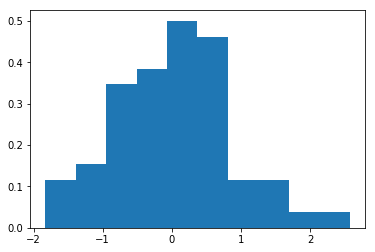

In [220]:
plt.hist(res.resid, density=1, histtype="stepfilled")

In [206]:
np.mean(res.resid), np.std(res.resid)

(1.0149771795159584e-12, 0.8630465883419473)

In [209]:
stats.norm.pdf(res.resid)

array([0.3199438 , 0.27501623, 0.21541821, 0.14054404, 0.13432929,
       0.38656452, 0.29412691, 0.37150696, 0.27367908, 0.39874038,
       0.39857736, 0.3687681 , 0.35060107, 0.31760689, 0.39856126,
       0.36274112, 0.32333675, 0.37433079, 0.20799969, 0.37034736,
       0.17317203, 0.32007315, 0.3506796 , 0.39851571, 0.20755441,
       0.33111563, 0.15460405, 0.38811062, 0.01465717, 0.15893965,
       0.39412193, 0.203156  , 0.07467899, 0.2792455 , 0.39742988,
       0.32297768, 0.31531164, 0.32662135, 0.39848483, 0.0739397 ,
       0.39297411, 0.34116732, 0.39888537, 0.20970825, 0.32959261,
       0.25934938, 0.34684505, 0.28241711, 0.39419965, 0.37051449,
       0.16853607, 0.39892302, 0.25066664, 0.39730967, 0.39537412,
       0.2676351 , 0.38065322, 0.35629421, 0.35092271])